# Atividade de Regressão Linear

## Código-fonte disponível em: [link](https://github.com/italoPontes/Machine-learning/tree/master/Tarefas/Regress%C3%A3o-Linear-Simples-do-Zero)




In [54]:
%matplotlib notebook
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#Federal University of Campina Grande (UFCG)
#Author: Ítalo de Pontes Oliveira
#Adapted from: Siraj Raval
#Available at: https://github.com/llSourcell/linear_regression_live

#The optimal values of m and b can be actually calculated with way less effort than doing a linear regression. 
#this is just to demonstrate gradient descent

"""This project will calculate linear regression
"""
import matplotlib.pyplot as plt

import numpy
from numpy import *
import sys

# y = mx + b
# m is slope, b is y-intercept
## Compute the errors for a given line
#  @param b Is the linear coefficient
#  @param m Is the angular coefficient
#  @param x Domain points
#  @param y Domain points
def compute_error_for_line_given_points(w0, w1, x, y):
	totalError = sum((y - (w1 * x + w0)) ** 2)
	totalError /= float(len(x))
	return totalError

## Calculate a new linear and angular coefficient step by a learning rate. 
#  @param w0_current Current linear coefficient
#  @param w1_current Current linear coefficient
#  @param x Domain points
#  @param y Image points
#  @param learningRate The rate in which the gradient will be changed in one step
def step_gradient(w0_current, w1_current, x, y, learningRate):
	w0_gradient = 0
	w1_gradient = 0
	norma = 0
	N = float(len(x))
	
	w0_gradient = -2 * sum( y - ( w0_current + ( w1_current * x ) ) ) / N
	w1_gradient = -2 * sum( ( y - ( w0_current + ( w1_current * x ) ) ) * x ) / N

	norma = numpy.linalg.norm(w0_gradient - w1_gradient)
	
	new_w0 = w0_current - (learningRate * w0_gradient)
	new_w1 = w1_current - (learningRate * w1_gradient)
	
	return [new_w0, new_w1, norma]

## Run the descending gradient
#  @param x Domain points
#  @param y Image points
#  @param starting_w0 Linear coefficient initial
#  @param starting_w1 Angular coefficient initial
#  @param learning_rate The rate in which the gradient will be changed in one step
#  @param num_iterations Interactions number that the slope line will approximate before a stop.
def gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, num_iterations):
	w0 = starting_w0
	w1 = starting_w1
	rss_by_step = 0
	rss_total = []
	norma = learning_rate
	iteration_number = 0
	
	condiction = True
	if num_iteractions < 1:
		condiction = False
	
	while (norma > 0.001 and not condiction) or ( iteration_number < num_iteractions and condiction):
		w0, w1, norma = step_gradient(w0, w1, x, y, learning_rate)
		
		rss_by_step = compute_error_for_line_given_points(w0, w1, x, y)
		rss_total.append(rss_by_step)
		iteration_number += 1

	show_figure(rss_total, "Iteraction", "RSS")	
	
	return [w0, w1, iteration_number]

## Questões


#### 1. Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Baixe os dados aqui. Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.

RESOLUÇÃO: Arquivo baixado, encontra-se no diretório atual com o nome "income.csv".

#### 2. Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente.

RESOLUÇÃO: Foi preferível adicionar uma nova funcionalidade ao código. Ao final da execução é salvo um gráfico com o RSS para todas as iterações.


In [55]:
## Show figure 
#  @param data Data to show in the graphic.
#  @param xlabel Text to be shown in abscissa axis.
#  @param ylabel Text to be shown in ordinate axis.
def show_figure(data, xlabel, ylabel):
	plt.plot(data)
	plt.xlabel(xlabel)
	plt.ylabel(ylabel)

#### 3. O que acontece com o RSS ao longo das iterações (aumenta ou diminui) se você usar 1000 iterações e um learning_rate (tamanho do passo do gradiente) de 0.001? Por que você acha que isso acontece?


<IPython.core.display.Javascript object>


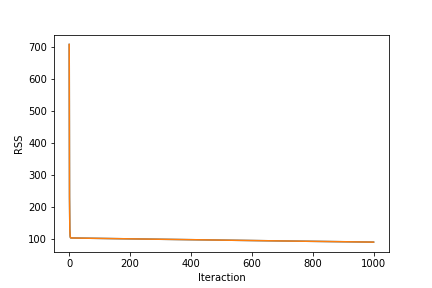

[-3.4034763175890652, 3.4539297809959373, 1000]

In [63]:
points = genfromtxt("income.csv", delimiter=",")
x = points[:,0] 
y = points[:,1]

starting_w0 = 0
starting_w1 = 0

learning_rate = 0.001
iterations_number = 100
gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)

In [64]:
learning_rate = 0.001
iterations_number = 1000
gradient_descent_runner(x, y, starting_w0, starting_w1, learning_rate, iterations_number)

[-3.4034763175890652, 3.4539297809959373, 1000]